In [1]:
import numpy as np
import matplotlib.pyplot as plt
from topo_tools import topo_tools
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Load data and plot
obj = topo_tools('OG_topo.npy', 'OG_lons.npy', 'OG_lats.npy')
obj.topo_m_to_km() #Elevation is now in Kilometers
obj.plot(obj.lons,obj.lats,obj.topo, title = 'Part Utah and part Colorado')

# 2.2 Random walk

Here I cut up the topography file into equally sized cells by accepting a 'cut'. So 1 cut would be a cut in the horizontal and vertical direction corresponding to 4 equally sized cells. From there 'walkers' is the number of random walks that will be initiated from the center of the cell. These walkers are defined by the random walk function which has a 'proportion' as one of its parameters. This parameter defines how often the random walker will be biased to maximize its speed (by walking downhill) versus walk in a randomly chosen direction (one of the eight cardinal directions). The get_stats function handles setting up the grids and random walkers and also constructs a weighted graph of where each of the random walkers ends up.

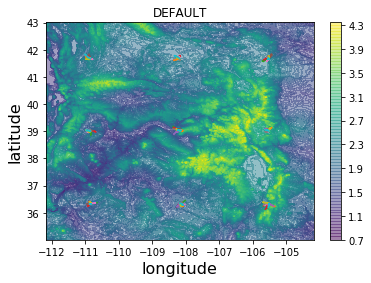

In [3]:
a2 = obj.get_stats(cuts = 2, walkers = 10)

The adjacency matrix below is set up in the traditional way where the first row corresponds to the outputs of the first node, so index 0,0 corresponds to how many walkers from zone 0 ended up in zone 0 (after walking for 8 hrs) and 0,1 corresponds to how many walkers from zone 0 ended up in zone 1. The zones start in the bottom left hand corner and go left to right bottom to top. In this case we sent out 10 random walkers per zone so the weight of the 'connection' is the proportion of walkers that ended up in that zone. 

Below we see that 1 of the walkers from zone 1 ended up in zone 0, 5 ended up back in zone 1, 3 ended up in zone 2 and 1 ends up in zone 5. All of this corresponds with what we see in the graph. We also note that generally the walkers seem to walk down river beds and stay in lower elevations as desired. 

In [4]:
a2

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

# Chris

In [6]:
#Load data and plot
obj = topo_tools('BOX4_1000_topo.npy', 'BOX4_1000_lons.npy', 'BOX4_1000_lats.npy')
obj.topo_m_to_km() #Elevation is now in Kilometers
obj.plot(obj.lons,obj.lats,obj.topo, title = 'Part Utah and part Colorado')

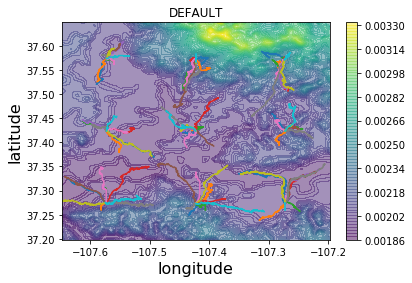

In [7]:
adjacency_4_1000 = obj.get_stats(cuts = 2, walkers = 10)

In [8]:
adjacency_4_1000

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.9, 0. , 0. , 0.1, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.9, 0. , 0. , 0.1, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1, 0. , 0. , 0.8, 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0.8, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0.1, 0.8]])

^^ How are the zones decided?